In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime 
import calendar
from pathlib import Path

In [12]:

p = Path(os.getcwd()).parents[2] #donne path vers fichier contenant data ( 3 level up d ici)
df=pd.read_csv(str(p)+"\\data\\f_ETHUSD_1.csv",)

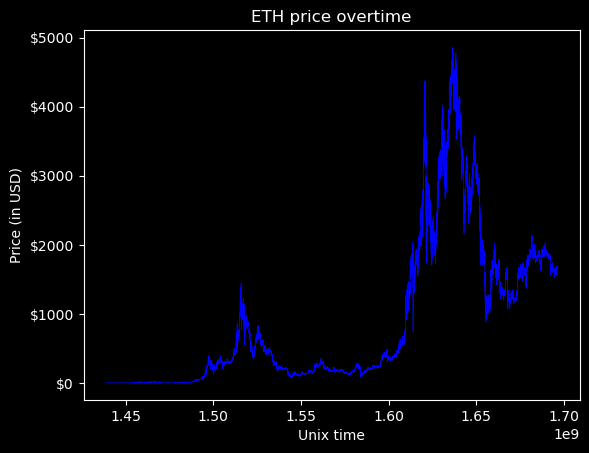

In [3]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"],linewidth=0.5,color="b")
plt.title("ETH price overtime")
plt.xlabel("Unix time")
plt.ylabel("Price (in USD)")
y_ticks=list(range(0,5001,1000))
plt.yticks(y_ticks,labels=[f"${tick}" for tick in y_ticks])
plt.show()

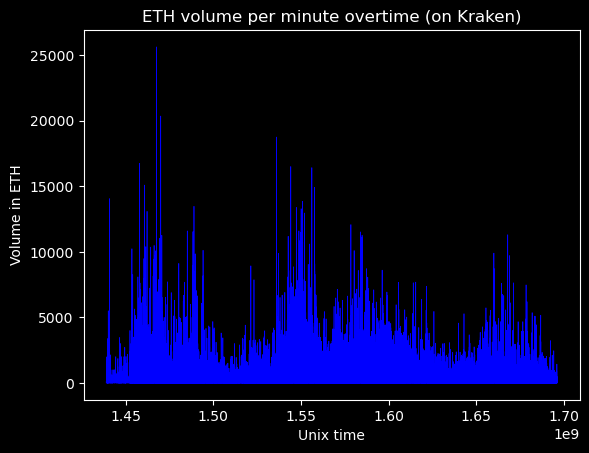

In [4]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Volume"],linewidth=0.5,color="b")
plt.title("ETH volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in ETH")
#y_ticks=list(range(0,19,2))
#plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

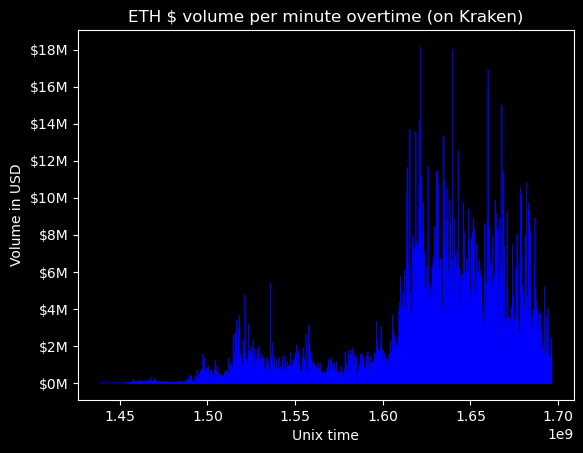

In [5]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"]*df["Volume"]/1000000,linewidth=0.5,color="b")
plt.title("ETH $ volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in USD")
y_ticks=list(range(0,19,2))
plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

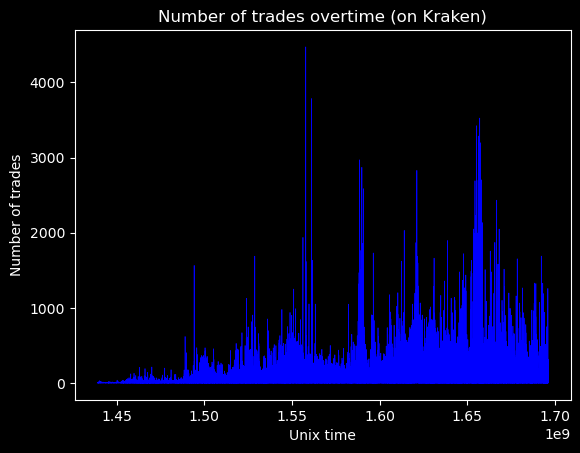

In [6]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Trades"],linewidth=0.5,color="b")
plt.title("Number of trades overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Number of trades")
plt.show()

In [64]:
hours=np.arange(0,24,1)
week=np.arange(0,7,1)
sum_count=np.zeros((len(week),len(hours),2))
for ind,time in enumerate(df["Time"]):
   hour=datetime.datetime.utcfromtimestamp(time).hour
   weekday=datetime.datetime.utcfromtimestamp(time).weekday()
   sum_count[weekday][hour][0]+=df["Trades"][ind]
   sum_count[weekday][hour][1]+=1
sum_count

        

array([[[346188.,  18254.],
        [279765.,  17637.],
        [243833.,  17247.],
        [230809.,  16896.],
        [206913.,  16938.],
        [202287.,  16704.],
        [226269.,  16997.],
        [232504.,  16942.],
        [245634.,  17343.],
        [240734.,  17291.],
        [230608.,  17358.],
        [236462.,  17571.],
        [297660.,  18254.],
        [342610.,  18664.],
        [404864.,  19029.],
        [371831.,  19155.],
        [405905.,  19231.],
        [326738.,  18811.],
        [307464.,  18802.],
        [330142.,  18865.],
        [328807.,  18785.],
        [311321.,  18450.],
        [300805.,  18425.],
        [295754.,  18292.]],

       [[381760.,  18547.],
        [284477.,  18007.],
        [240503.,  17626.],
        [248419.,  17489.],
        [244908.,  17170.],
        [228120.,  17095.],
        [220368.,  17270.],
        [213936.,  17333.],
        [261564.,  17636.],
        [246259.,  17645.],
        [236223.,  17755.],
        [270777., 

In [65]:
means=np.zeros((7,24))
for i in range(7):
    for j in range(24):
        means[i][j]=sum_count[i][j][0]/sum_count[i][j][1]
means
        

array([[18.96504876, 15.86239156, 14.13770511, 13.66057055, 12.21590507,
        12.11009339, 13.3122904 , 13.72352733, 14.16329355, 13.92250304,
        13.28540154, 13.45751522, 16.30656295, 18.35672953, 21.27615744,
        19.41169407, 21.10680672, 17.36951784, 16.35272843, 17.50023854,
        17.50369976, 16.87376694, 16.32591588, 16.16848896],
       [20.58338276, 15.79813406, 13.64478611, 14.20429985, 14.26371578,
        13.34425271, 12.76016213, 12.3426989 , 14.83125425, 13.9563049 ,
        13.30459026, 15.05906234, 16.53812973, 18.81189769, 21.26309853,
        19.95443193, 19.77072049, 17.12819445, 17.56788131, 18.00357725,
        18.73538884, 15.78615082, 15.00993199, 15.03080116],
       [17.7136642 , 14.35430244, 14.19611826, 14.55153603, 14.27573171,
        12.54743976, 12.88643297, 12.66668573, 13.80497197, 12.3217476 ,
        13.41936563, 14.64222013, 18.07560009, 19.8648193 , 20.45247966,
        19.53728588, 21.58227848, 18.00267562, 20.53125658, 19.74227779,
  

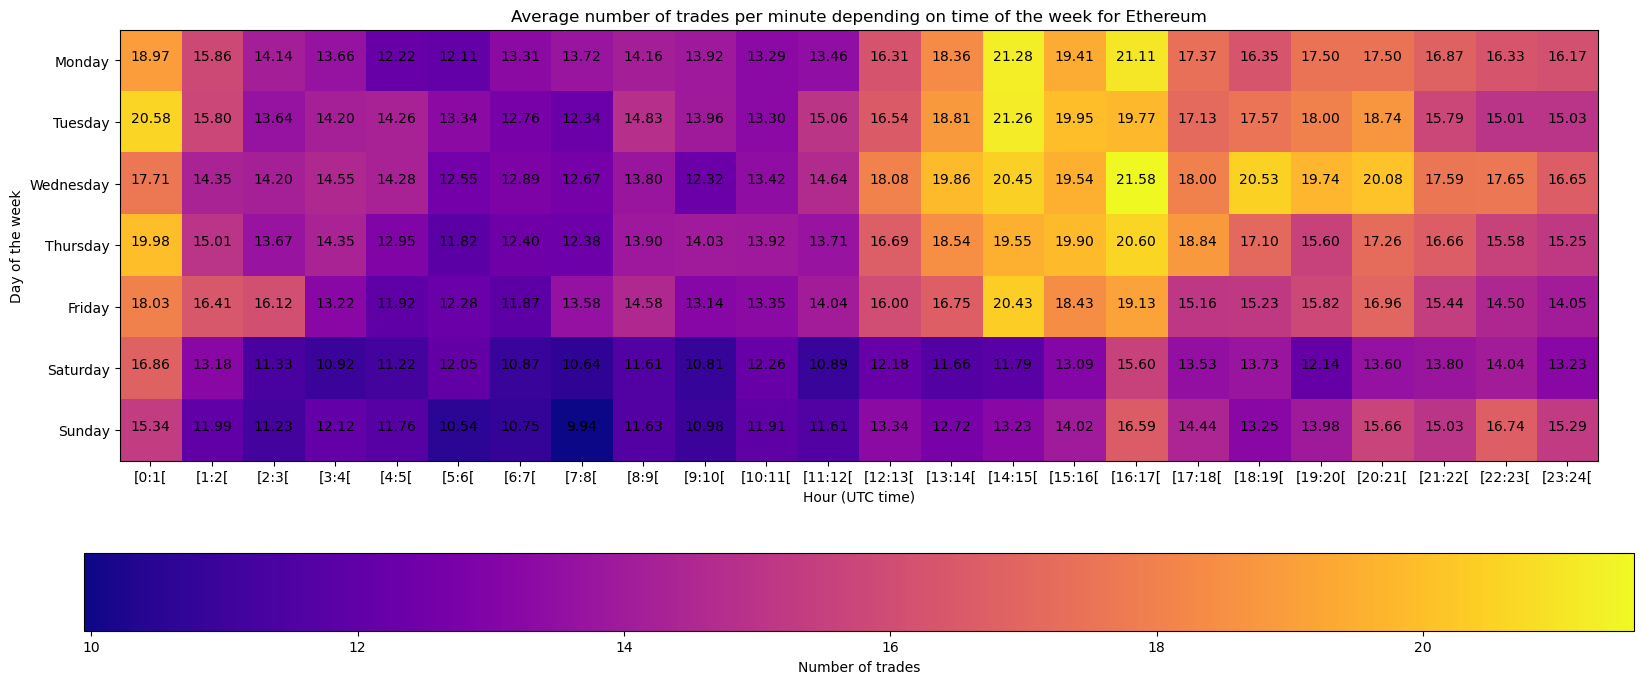

In [78]:
fig, ax = plt.subplots()
im=ax.imshow(means,cmap="plasma")
hours=np.arange(0,24,1)
week=np.arange(0,7,1)
for i in week:
    for j in hours:
        ax.text(j,i,f"{means[i][j]:.2f}",horizontalalignment="center")
        
ax.set_xlabel("Hour (UTC time)")
ax.set_ylabel("Day of the week")
ax.set_title("Average number of trades per minute depending on time of the week for Ethereum")
cbar = ax.figure.colorbar(im, ax=ax,location="bottom",label="Number of trades")
x_ticks=np.arange(0,24,1)
y_ticks=np.arange(0,7,1)
ax.set_xticks(ticks=x_ticks,labels=[f"[{i}:{i+1}[" for i in x_ticks])
ax.set_yticks(ticks=y_ticks,labels=[i for i in calendar.day_name])
fig.set_figheight(8)
fig.set_figwidth(20)

plt.show()